In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('NTAD_Fatality_Analysis_Reporting_System_2023_Accidents_-1547396067495048743.csv')
df.head()

,OBJECTID,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,...,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,x,y
0,1,1,Alabama,10001,0,0,1,1,0,1,...,10:00pm-10:59pm,45,45,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.633459e+06,3.753860e+06
1,2,1,Alabama,10002,0,0,1,1,0,1,...,2:00am-2:59am,23,23,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.826529e+06,3.569113e+06
2,3,1,Alabama,10003,0,0,1,1,0,1,...,11:00pm-11:59pm,8,8,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.615313e+06,4.128378e+06
3,4,1,Alabama,10004,0,0,1,1,0,3,...,7:00pm-7:59pm,44,44,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,-9.656598e+06,3.634669e+06
4,5,1,Alabama,10005,0,0,1,1,0,4,...,3:00pm-3:59pm,8,8,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,-9.756463e+06,3.636309e+06


In [6]:
def analyze_columns_with_uniques(df):
    analysis = []
    for column in df.columns:
        col_data = df[column]
        col_type = col_data.dtype
        missing_percentage = col_data.isnull().mean() * 100
        null_count = col_data.isnull().sum()
        unique_values = col_data.nunique()
        
        if pd.api.types.is_numeric_dtype(col_data):
            col_min = col_data.min()
            col_max = col_data.max()
            col_mean = col_data.mean()
            col_median = col_data.median()
            col_std = col_data.std()
        else:
            col_min = col_max = col_mean = col_median = col_std = None
        
        analysis.append({
            'Column': column,
            'Type': col_type,
            'Missing Value (%)': missing_percentage,
            'Null Value Count': null_count,
            'Unique Values': unique_values,
            'Min': col_min,
            'Max': col_max,
            'Mean': col_mean,
            'Median': col_median,
            'Std': col_std
        })
    
    return pd.DataFrame(analysis)

In [8]:
anal = analyze_columns_with_uniques(df)
anal.to_csv('analysis.csv', index=False)

In [14]:
df[["NOT_HOUR", "NOT_MIN"]].describe

<bound method NDFrame.describe of        NOT_HOUR  NOT_MIN
0            22       20
1             2        8
2            22       48
3            19        0
4            14       53
...         ...      ...
37946        99       98
37947        99       98
37948        99       98
37949        11       43
37950        99       98

[37951 rows x 2 columns]>

In [15]:
df['date'] = pd.to_datetime({
    'year': df['YEAR'],
    'month': df['MONTH'],
    'day': df['DAY'],
    # 'hour': df['time hr'],
    # 'minute': df['time min']
})

In [16]:
df['date']

0       2023-01-04
1       2023-03-20
2       2023-03-18
3       2023-03-17
4       2023-03-17
           ...    
37946   2023-06-22
37947   2023-07-30
37948   2023-09-15
37949   2023-09-23
37950   2023-12-04
Name: date, Length: 37951, dtype: datetime64[ns]

In [ ]:
# ...existing code...

import plotly.express as px

def categorize_not_hour(val):
    if 0 <= val <= 23:
        return 'Valid Military Times'
    elif 99 <= val <= 23:
        return 'Known Hours, Unknown Minutes'
    elif val == 88:
        return 'Not Applicable (Not Notified)'
    elif val == 9998 or val == 98:
        return 'Unknown if Notified'
    elif val == 99 or val == 9999:
        return 'Unknown EMS Notification Time'
    else:
        return 'Other'

not_hour_cat = df['NOT_HOUR'].apply(categorize_not_hour)
cat_counts = not_hour_cat.value_counts().sort_index()
cat_percents = 100 * cat_counts / len(df)

fig = px.bar(
    x=cat_counts.index,
    y=cat_counts.values,
    labels={'x': 'NOT_HOUR Category', 'y': 'Count'},
    title='Distribution of NOT_HOUR Categories',
    text=[f"{p:.1f}%" for p in cat_percents]
)
fig.update_traces(textposition='outside')
fig.show()
# ...existing code...

In [27]:
# ...existing code...

def categorize_not_hour(val):
    if 0 <= val <= 23:
        return 'Valid Military Times'
    elif 99 <= val <= 23:
        return 'Known Hours, Unknown Minutes'
    elif val == 88:
        return 'Not Applicable (Not Notified)'
    elif val == 9998 or val == 98:
        return 'Unknown if Notified'
    elif val == 99 or val == 9999:
        return 'Unknown EMS Notification Time'
    else:
        return 'Other'

not_hour_cat = df['NOT_HOUR'].apply(categorize_not_hour)
cat_counts = not_hour_cat.value_counts().sort_index()
cat_percents = 100 * cat_counts / len(df)

# Combine into a DataFrame for easy viewing
category_stats = pd.DataFrame({
    'Count': cat_counts,
    'Percent': cat_percents
}).reset_index().rename(columns={'index': 'Category'})

print(category_stats)
# ...existing code...

                        NOT_HOUR  Count    Percent
0  Not Applicable (Not Notified)    131   0.345182
1  Unknown EMS Notification Time  20148  53.089510
2           Valid Military Times  17672  46.565308


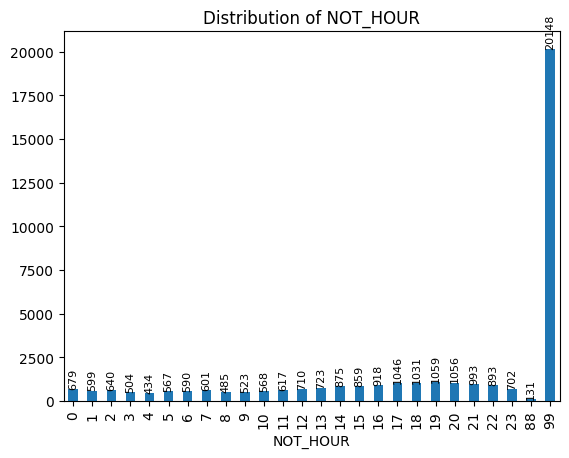

In [ ]:
ax = df["NOT_HOUR"].value_counts().sort_index().plot(kind=' bar', title='Distribution of NOT_HOUR')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation=90)

In [28]:
# ...existing code...

import plotly.express as px

def categorize_not_hour(val):
    if 0 <= val <= 60:
        return 'Valid Military Times'
    # elif 60 <= val <= 23:
    #     return 'Known Hours, Unknown Minutes'
    elif val == 88:
        return 'Not Applicable (Not Notified)'
    elif val == 9998 or val == 98:
        return 'Unknown if Notified'
    elif val == 99 or val == 9999:
        return 'Unknown Minutes'
    else:
        return 'Other'

not_hour_cat = df['NOT_MIN'].apply(categorize_not_hour)
cat_counts = not_hour_cat.value_counts().sort_index()
cat_percents = 100 * cat_counts / len(df)

fig = px.bar(
    x=cat_counts.index,
    y=cat_counts.values,
    labels={'x': 'NOT_MIN Category', 'y': 'Count'},
    title='Distribution of NOT_MIN Categories',
    text=[f"{p:.1f}%" for p in cat_percents]
)
fig.update_traces(textposition='outside')
fig.show()
# ...existing code...

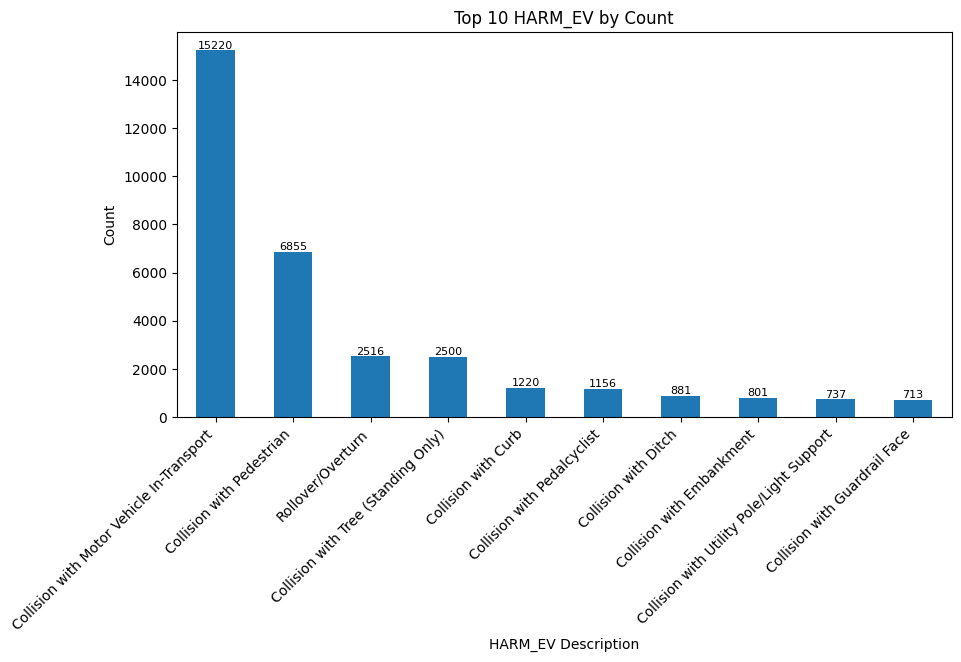

In [ ]:
# ...existing code...

# HARM_EV code to description mapping
harm_ev_map = {
    1: "Rollover/Overturn",
    2: "Fire/Explosion",
    3: "Immersion or Partial Immersion",
    4: "Gas Inhalation",
    5: "Fell/Jumped from Vehicle",
    6: "Injured in Vehicle (Non-Collision)",
    7: "Other Non-Collision",
    8: "Collision with Pedestrian",
    9: "Collision with Pedalcyclist",
    10: "Collision with Railway Vehicle",
    11: "Collision with Live Animal",
    12: "Collision with Motor Vehicle In-Transport",
    14: "Collision with Parked Motor Vehicle",
    15: "Collision with Non-Motorist on Personal Conveyance",
    16: "Thrown or Falling Object",
    17: "Collision with Boulder",
    18: "Collision with Other Object (Not Fixed)",
    19: "Collision with Building",
    20: "Collision with Impact Attenuator/Crash Cushion",
    21: "Collision with Bridge Pier or Support",
    23: "Collision with Bridge Rail (Includes Parapet)",
    24: "Collision with Guardrail Face",
    25: "Collision with Concrete Traffic Barrier",
    26: "Collision with Other Traffic Barrier",
    30: "Collision with Utility Pole/Light Support",
    31: "Collision with Other Post, Other Pole, or Other Supports",
    32: "Collision with Culvert",
    33: "Collision with Curb",
    34: "Collision with Ditch",
    35: "Collision with Embankment",
    38: "Collision with Fence",
    39: "Collision with Wall",
    40: "Collision with Fire Hydrant",
    41: "Collision with Shrubbery",
    42: "Collision with Tree (Standing Only)",
    43: "Collision with Other Fixed Object",
    44: "Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)",
    45: "Collision with Working Motor Vehicle",
    46: "Collision with Traffic Signal Support",
    48: "Collision with Snow Bank",
    49: "Collision with Ridden Animal or Animal Drawn Conveyance",
    50: "Collision with Bridge Overhead Structure",
    51: "Jackknife (harmful to this vehicle)",
    52: "Collision with Guardrail End",
    53: "Collision with Mail Box",
    54: "Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons or Objects Set-in-Motion from/by Another Motor Vehicle InTransport",
    55: "Collision with Motor Vehicle in Motion Outside the Trafficway",
    57: "Collision with Cable Barrier",
    58: "Collision with Ground",
    59: "Collision with Traffic Sign Support",
    72: "Cargo/Equipment Loss, Shift, or Damage [harmful]",
    73: "Collision with Object That Had Fallen from Motor Vehicle In-Transport",
    74: "Collision with Road Vehicle on Rails",
    91: "Unknown Object, Not Fixed New in 2017",
    93: "Unknown Fixed Object New in 2017",
    99: "Reported As Unknown"
}

# Get top 10 HARM_EV codes by count
top10 = df['HARM_EV'].value_counts().head(10)

# Map codes to descriptions
top10_desc = top10.rename(index=harm_ev_map)

# Plot
ax = top10_desc.plot(kind='barh', figsize=(10,5), title='Top 10 HARM_EV by Count')
ax.set_xlabel('HARM_EV Description')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation=0)
# ...existing code...

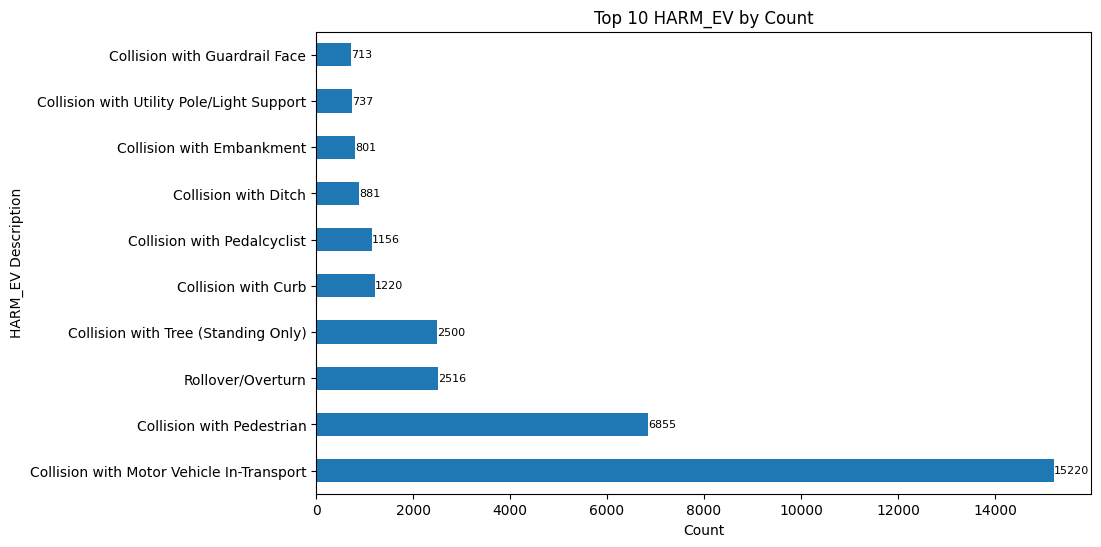

In [31]:
# ...existing code...

# HARM_EV code to description mapping
harm_ev_map = {
    1: "Rollover/Overturn",
    2: "Fire/Explosion",
    3: "Immersion or Partial Immersion",
    4: "Gas Inhalation",
    5: "Fell/Jumped from Vehicle",
    6: "Injured in Vehicle (Non-Collision)",
    7: "Other Non-Collision",
    8: "Collision with Pedestrian",
    9: "Collision with Pedalcyclist",
    10: "Collision with Railway Vehicle",
    11: "Collision with Live Animal",
    12: "Collision with Motor Vehicle In-Transport",
    14: "Collision with Parked Motor Vehicle",
    15: "Collision with Non-Motorist on Personal Conveyance",
    16: "Thrown or Falling Object",
    17: "Collision with Boulder",
    18: "Collision with Other Object (Not Fixed)",
    19: "Collision with Building",
    20: "Collision with Impact Attenuator/Crash Cushion",
    21: "Collision with Bridge Pier or Support",
    23: "Collision with Bridge Rail (Includes Parapet)",
    24: "Collision with Guardrail Face",
    25: "Collision with Concrete Traffic Barrier",
    26: "Collision with Other Traffic Barrier",
    30: "Collision with Utility Pole/Light Support",
    31: "Collision with Other Post, Other Pole, or Other Supports",
    32: "Collision with Culvert",
    33: "Collision with Curb",
    34: "Collision with Ditch",
    35: "Collision with Embankment",
    38: "Collision with Fence",
    39: "Collision with Wall",
    40: "Collision with Fire Hydrant",
    41: "Collision with Shrubbery",
    42: "Collision with Tree (Standing Only)",
    43: "Collision with Other Fixed Object",
    44: "Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)",
    45: "Collision with Working Motor Vehicle",
    46: "Collision with Traffic Signal Support",
    48: "Collision with Snow Bank",
    49: "Collision with Ridden Animal or Animal Drawn Conveyance",
    50: "Collision with Bridge Overhead Structure",
    51: "Jackknife (harmful to this vehicle)",
    52: "Collision with Guardrail End",
    53: "Collision with Mail Box",
    54: "Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons or Objects Set-in-Motion from/by Another Motor Vehicle InTransport",
    55: "Collision with Motor Vehicle in Motion Outside the Trafficway",
    57: "Collision with Cable Barrier",
    58: "Collision with Ground",
    59: "Collision with Traffic Sign Support",
    72: "Cargo/Equipment Loss, Shift, or Damage [harmful]",
    73: "Collision with Object That Had Fallen from Motor Vehicle In-Transport",
    74: "Collision with Road Vehicle on Rails",
    91: "Unknown Object, Not Fixed New in 2017",
    93: "Unknown Fixed Object New in 2017",
    99: "Reported As Unknown"
}

# Get top 10 HARM_EV codes by count
top10 = df['HARM_EV'].value_counts().head(10)

# Map codes to descriptions
top10_desc = top10.rename(index=harm_ev_map)

# Horizontal bar plot
ax = top10_desc.plot(kind='barh', figsize=(10, 6), title='Top 10 HARM_EV by Count')
ax.set_xlabel('Count')
ax.set_ylabel('HARM_EV Description')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8)
# ...existing code...

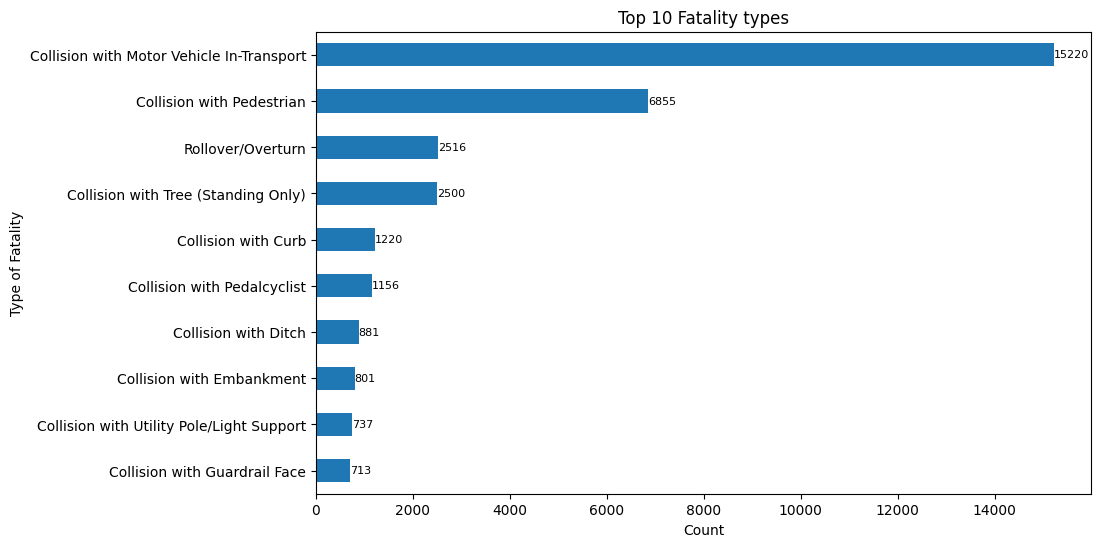

In [34]:
# ...existing code...

# Get top 10 HARM_EV codes by count (already in descending order)
top10 = df['HARM_EV'].value_counts().head(10)

# Map codes to descriptions
top10_desc = top10.rename(index=harm_ev_map)

# Sort in descending order for horizontal bar plot
top10_desc = top10_desc.sort_values(ascending=True)  # So the largest is at the top of the horizontal bar

# Horizontal bar plot
ax = top10_desc.plot(kind='barh', figsize=(10, 6), title='Top 10 Fatality types')
ax.set_xlabel('Count')
ax.set_ylabel('Type of Fatality')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8)
# ...existing code...

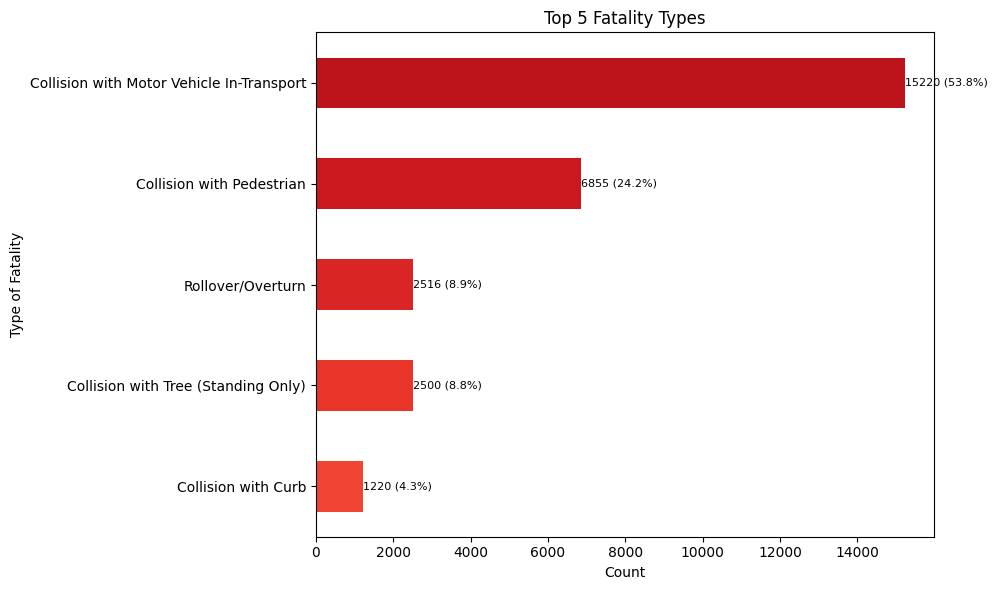

In [40]:
# ...existing code...

# Get top 10 HARM_EV codes by count (already in descending order)
top10 = df['HARM_EV'].value_counts().head(5)

# Map codes to descriptions
top10_desc = top10.rename(index=harm_ev_map)

# Calculate percentages
top10_percent = 100 * top10_desc / top10_desc.sum()

# Sort in ascending order for horizontal bar plot (largest at top)
top10_desc = top10_desc.sort_values(ascending=True)
top10_percent = top10_percent[top10_desc.index]  # align order

# Color mapping: high (red) to low (lightcoral)
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.Reds(np.linspace(0.6, 0.8, len(top10_desc)))  # darker red for higher values

# Horizontal bar plot with count and percent
ax = top10_desc.plot(
    kind='barh',
    figsize=(10, 6),
    title='Top 5 Fatality Types',
    color=colors
)
ax.set_xlabel('Count')
ax.set_ylabel('Type of Fatality')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
for i, p in enumerate(ax.patches):
    count = int(p.get_width())
    percent = top10_percent.iloc[i]
    ax.annotate(f"{count} ({percent:.1f}%)", (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8)
plt.tight_layout()
plt.show()
# ...existing code...

In [42]:
# ...existing code...

# Group by state and aggregate
state_stats = df.groupby('STATENAME').agg(
    Avg_Fatalities=('FATALS', 'mean'),
    Avg_Vehicles=('VE_TOTAL', 'mean'),
    Median_Hour=('HOUR', 'median')  # Replace 'HOUR' with your actual hour column name
).reset_index()


# Reorder columns for display
state_stats = state_stats[['STATENAME', 'Avg_Fatalities', 'Avg_Vehicles', 'Median_Hour']]

# Show the result
print(state_stats.head())
# ...existing code...

    STATENAME  Avg_Fatalities  Avg_Vehicles  Median_Hour
0     Alabama        1.090705      1.564390         14.0
1      Alaska        1.071429      1.553571         17.0
2     Arizona        1.091213      1.660251         15.0
3    Arkansas        1.099631      1.570111         14.0
4  California        1.089616      1.583579         15.0


In [49]:
# ...existing code...

def mode_or_nan(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else np.nan

# Group by state and aggregate
state_stats = df.groupby('STATENAME').agg(
    Total_Crashes=('STATENAME', 'count'),
    Total_Fatalities=('FATALS', 'sum'),
    Avg_Fatalities=('FATALS', 'mean'),
    Avg_Vehicles=('VE_TOTAL', 'mean'),
    Median_Hour=('HOUR', mode_or_nan),
    Mode_HR_EVE=('HARM_EV', mode_or_nan),
    Avg_Day_of_Week=('DAY_WEEK', mode_or_nan)  # Most common day of week
).reset_index()

# Reorder columns for display
state_stats = state_stats[['STATENAME', 'Total_Crashes', 'Total_Fatalities', 'Avg_Fatalities', 'Avg_Vehicles', 'Median_Hour', 'Mode_HR_EVE', 'Avg_Day_of_Week']]
# Order by Total_Crashes descending

state_stats = state_stats.sort_values(by='Total_Crashes', ascending=False)

# Show the result
state_stats.head(10)
# ...existing code...

,STATENAME,Total_Crashes,Total_Fatalities,Avg_Fatalities,Avg_Vehicles,Median_Hour,Mode_HR_EVE,Avg_Day_of_Week
44,Texas,3874,4291,1.107641,1.631905,21,12,1
4,California,3727,4061,1.089616,1.583579,20,12,1
9,Florida,3183,3396,1.066918,1.620798,20,12,7
10,Georgia,1491,1615,1.083166,1.557344,19,12,7
33,North Carolina,1449,1561,1.077295,1.563837,21,12,7
43,Tennessee,1219,1323,1.085316,1.612797,20,12,7
2,Arizona,1195,1304,1.091213,1.660251,18,12,7
35,Ohio,1150,1242,1.080000,1.617391,19,12,7
13,Illinois,1143,1241,1.085739,1.664042,21,12,7
38,Pennsylvania,1133,1211,1.068844,1.593998,18,12,7
